In [3]:
!pip install --upgrade tensorflow-gpu==2.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.5/495.5 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 30.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.7.0 which is incompatible.
tensorflow 2.9.2 requires tens

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [5]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [67]:
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model

In [7]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
from google.colab import files
uploaded = files.upload()

Saving True.csv to True.csv


In [9]:
import io
df_true = pd.read_csv(io.BytesIO(uploaded['True.csv']))

In [10]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [11]:
import io
df_fake = pd.read_csv(io.BytesIO(uploaded['Fake.csv']))

In [62]:
from google.colab import files
uploaded = files.upload()

Saving glove.6B.100d.txt to glove.6B.100d.txt


In [10]:
# print(tf.test.is_gpu_available())
# import tensorflow as tf
# print(tf.config.list_physical_devices('GPU'))

In [ ]:
# load the data
# df_true = pd.read_csv("/kaggle/input/rue-and-fake-news/True.csv")
# df_fake = pd.read_csv("/kaggle/input/rue-and-fake-news/Fake.csv")

MINI CHALLENGE #1:

    Indicate how many data samples do we have per class (i.e.: Fake and True)
    List how many Null element are present and the memory usage for each dataframe



In [12]:
print(df_true.info())
print(df_fake.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [13]:
# add a target class column to indicate whether the news is real or fake
df_true['isfake'] = 0
df_true.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [14]:
df_fake['isfake'] = 1
df_fake.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [15]:
# Concatenate Real and Fake News
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [16]:
df.drop(columns = ['date'], inplace = True)

In [17]:
# combine title and text together
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...


In [18]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

# TASK #4: PERFORM DATA CLEANING

In [19]:
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [21]:
# Remove stopwords and remove words with 3 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [22]:
# Apply the function to the dataframe
df['clean'] = df['original'].apply(preprocess)

In [23]:
# Show original news
print(df['original'][0])

As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-

In [24]:
# Show cleaned up news after removing stopwords
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [25]:
df.head()

,title,text,subject,isfake,original,clean
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon..."


In [26]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)
        
        
# print(list_of_words)

In [27]:
print(len(list_of_words))

9277072


In [28]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
print(total_words)

108705


In [29]:
# join the words into a string
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))
df.head()

,title,text,subject,isfake,original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...


MINI CHALLENGE #2:
- Perform sanity check on the prepocessing stage by visualizing at least 3 sample news 

In [30]:
print(df['original'][100])
print("\nLength: ", len(df['original'][100]))

Senator Warren hits out at 'effort to politicize' U.S. consumer agency WASHINGTON (Reuters) - Democratic Senator Elizabeth Warren is taking aim at budget chief Mick Mulvaney’s plan to fill the ranks of the U.S. consumer financial watchdog with political allies, according to letters seen by Reuters, the latest salvo in a broader battle over who should run the bureau. President Donald Trump last month appointed Mulvaney as acting director of the Consumer Financial Protection Bureau (CFPB), though the decision is being legally challenged by the agency’s deputy director, Leandra English, who says she is the rightful interim head. Mulvaney told reporters earlier this month he planned to bring in several political appointees to help overhaul the agency, but Warren warned in a pair of letters sent Monday to Mulvaney and the Office of Personnel Management (OPM), which oversees federal hiring, that doing so was inappropriate and potentially illegal. The CFPB is meant to be an independent agency

In [31]:
print(df['clean_joined'][100])
print("\nLength: ", len(df['clean_joined'][100]))

senator warren hits effort politicize consumer agency washington reuters democratic senator elizabeth warren taking budget chief mick mulvaney plan ranks consumer financial watchdog political allies according letters seen reuters latest salvo broader battle bureau president donald trump month appointed mulvaney acting director consumer financial protection bureau cfpb decision legally challenged agency deputy director leandra english says rightful interim head mulvaney told reporters earlier month planned bring political appointees help overhaul agency warren warned pair letters sent monday mulvaney office personnel management oversees federal hiring inappropriate potentially illegal cfpb meant independent agency staffed primarily political employees hiring political appointees violate civil service laws designed protect employees undue political pressure discrimination warren said naked effort politicize consumer agency runs counter agency mission independent voice consumers power sta

# TASK #5: VISUALIZE CLEANED UP DATASET

In [32]:
df.tail()

,title,text,subject,isfake,original,clean,clean_joined
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1,McPain: John McCain Furious That Iran Treated ...,"[mcpain, john, mccain, furious, iran, treated,...",mcpain john mccain furious iran treated sailor...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[justice, yahoo, settles, mail, privacy, class...",justice yahoo settles mail privacy class actio...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[sunnistan, allied, safe, zone, plan, territor...",sunnistan allied safe zone plan territorial bo...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1,How to Blow $700 Million: Al Jazeera America F...,"[blow, million, jazeera, america, finally, cal...",blow million jazeera america finally calls qui...
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,1,10 U.S. Navy Sailors Held by Iranian Military ...,"[navy, sailors, held, iranian, military, signs...",navy sailors held iranian military signs neoco...


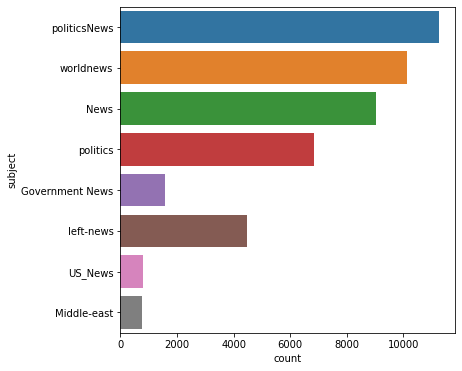

In [33]:
# plot the number of samples in 'subject'
plt.figure(figsize = (6,6))
sns.countplot(y = "subject", data = df)
plt.show()

MINI CHALLENGE #3: 
- Plot the count plot for fake vs. true newsimport plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

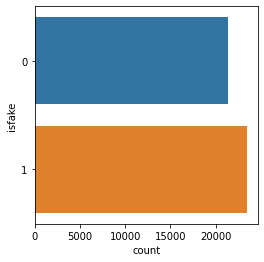

In [34]:
# plot the number of samples in 'isfake' 
plt.figure(figsize = (4,4))
sns.countplot(y = "isfake", data = df)
plt.show()

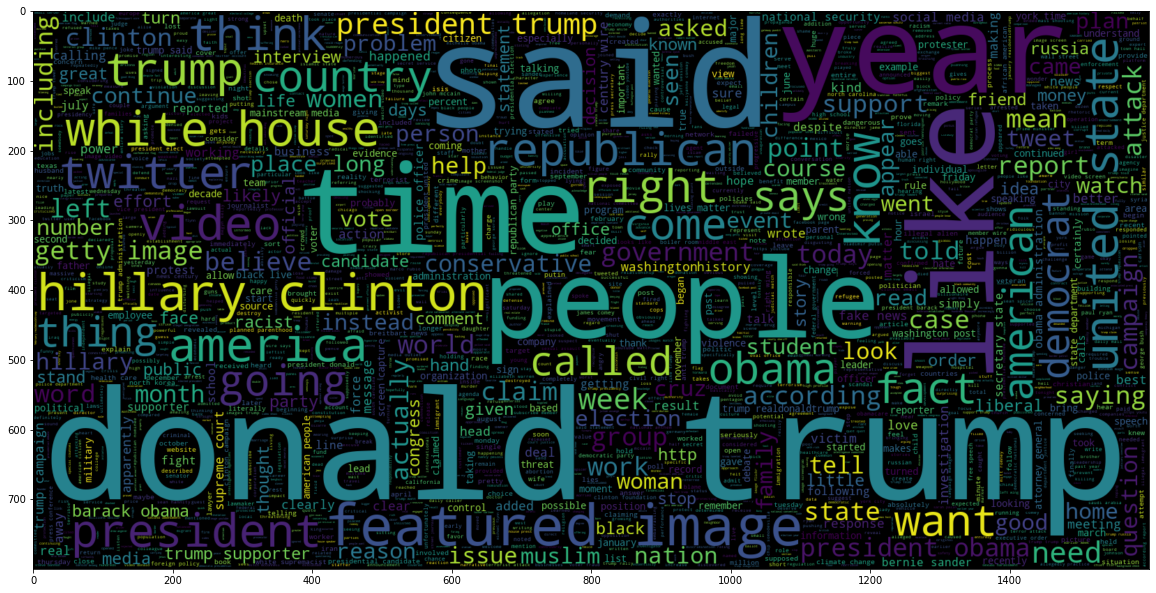

In [35]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

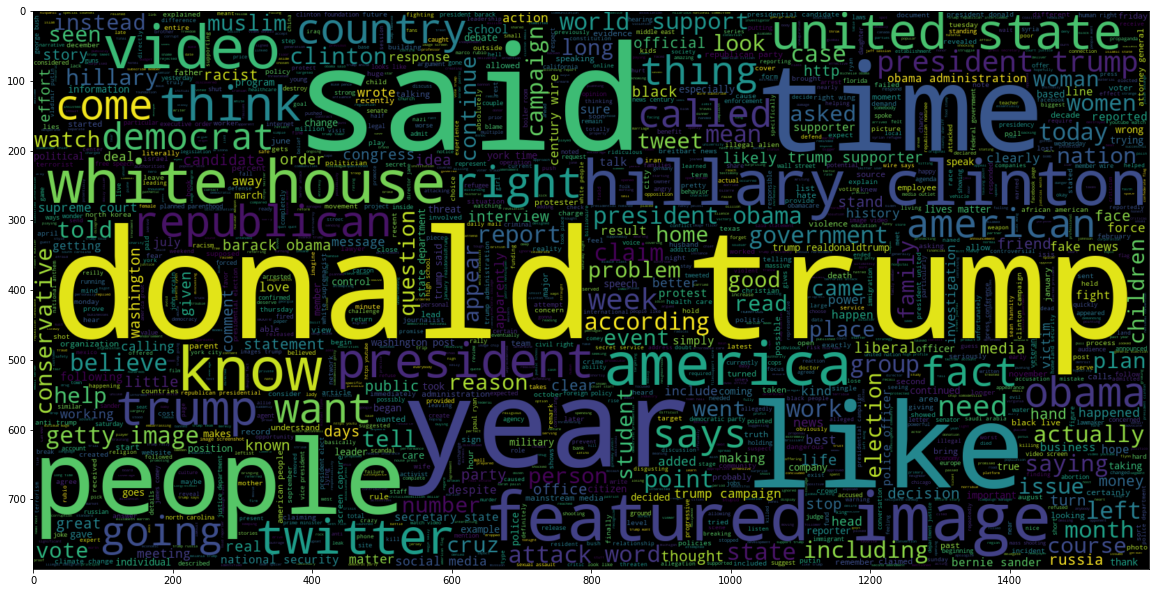

In [36]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

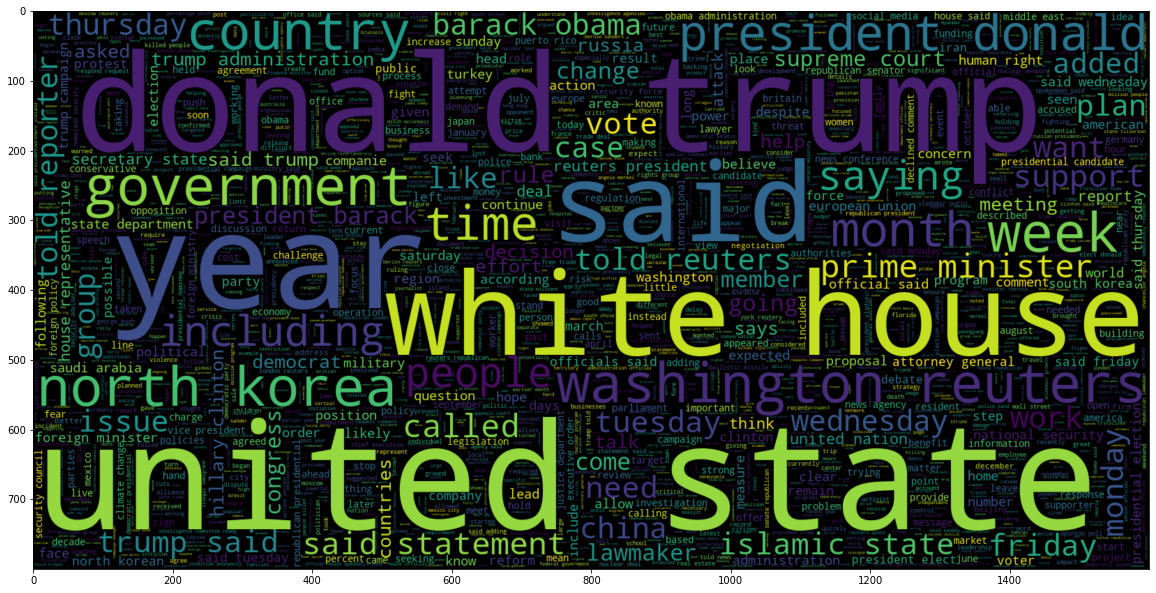

In [37]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

In [38]:
df['length'] = df['clean'].apply(len)
maxlen =df['length'].max()
print("The maximum number of words in any document is =", maxlen)
df.head()

The maximum number of words in any document is = 4406


,title,text,subject,isfake,original,clean,clean_joined,length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...,383
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...,337
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...,226
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...,206
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...,435


In [39]:
import plotly.express as px
fig = px.histogram(x = df['length'], nbins = 100)
fig.show()

# TASK #6: PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

In [40]:
# split data into test and train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)

In [41]:
from nltk import word_tokenize

In [42]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [61]:
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

99216

In [43]:
print(len(train_sequences))
print(len(test_sequences))

35918
8980


In [44]:
print(x_train[0])
print(len(train_sequences[0]))

budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise p

In [45]:
print("The encoding for document\n",df.clean_joined[1],"\n is : ",train_sequences[1])

The encoding for document
 military accept transgender recruits monday pentagon washington reuters transgender people allowed time enlist military starting monday ordered federal courts pentagon said friday president donald trump administration decided appeal rulings blocked transgender federal appeals courts washington virginia week rejected administration request hold orders lower court judges requiring military begin accepting transgender recruits justice department official said administration challenge rulings department defense announced releasing independent study issues coming weeks litigate interim appeal occurs administration decided wait study continue defend president lawful authority district court meantime official said speaking condition anonymity september pentagon said created panel senior officials study implement directive trump prohibit transgender individuals serving defense department submit plan trump lawyers representing currently serving transgender service mem

In [46]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = maxlen, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen =  maxlen, truncating = 'post') 

In [47]:
maxlen

4406

In [48]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [ 2142  6599 27358 ...     0     0     0]
The padded encoding for document 2  is :  [  381 10388    22 ...     0     0     0]


In [63]:
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
  for line in f:
    values = line.split()
    word = values[0]
    coeffs = values[1:]
    embedding_index[word] = coeffs

embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
  embedding_vector = embedding_index.get(word)
  if embedding_vector != None:
    embedding_matrix[i] = embedding_vector

In [65]:
embedding_matrix

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [-0.15731  , -0.75503  ,  0.36845  , ..., -0.54137  ,  0.67817  ,
        -0.17251  ],
       [-0.13128  , -0.452    ,  0.043399 , ..., -0.30526  , -0.045495 ,
         0.56509  ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [-0.15133  , -0.33415  , -0.54215  , ...,  0.10523  , -0.12671  ,
         0.0095475]])

In [66]:
padded_train[0]

array([ 2142,  6599, 27358, ...,     0,     0,     0], dtype=int32)

# TASK #7: BUILD AND TRAIN THE MODEL 

In [73]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128, return_sequences=True)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         13914240  
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 256)        263168    
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, None, 128)         32896     
                                                                 
 dense_6 (Dense)             (None, None, 1)           129       
                                                                 
Total params: 14,210,433
Trainable params: 14,210,433
Non-trainable params: 0
_________________________________________________________________


In [68]:
# model = Sequential([ 
#     Embedding(vocab_size+1, 100, weights= [embedding_matrix], trainable = False),
#     Dropout(0.2),
#     LSTM(128, return_sequences=True),
#     LSTM(128),
#     Dropout(0.2),
#     Dense(512),
#     Dropout(0.2),
#     Dense(256),
#     Dense(1, activation='sigmoid')

# ]
# )

In [69]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
# model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         9921700   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 128)         117248    
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)              

In [72]:
total_words, vocab_size

(108705, 99216)

In [52]:
# Our vectorized labels
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [54]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
# tf.data.experimental.enable_debug_mode(True)

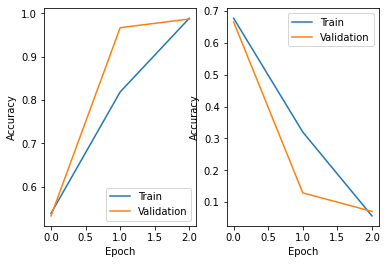

In [80]:
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.show()

In [1]:
# train the model
history = model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 10)

NameError: ignored

MINI CHALLENGE #4:
- Change the embedding output dimension and print out the model summary
- How many trainable parameters are there? 

In [ ]:
# # Sequential Model
# model = Sequential()

# # embeddidng layer
# # model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# # Bi-Directional RNN and LSTM
# model.add(Bidirectional(LSTM(128, return_sequences=True)))

# # Dense layers
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(1,activation= 'sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# model.summary()

# TASK #8: ASSESS TRAINED MODEL PERFORMANCE

In [82]:
# make prediction
predict_x=model.predict(padded_test) 
prediction=np.argmax(predict_x,axis=1)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4526: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



In [83]:
# prediction

In [84]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.4537861915367483


In [86]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix


In [87]:
cm = confusion_matrix(y_test, prediction)
cm

array([[4075,    0,    0, ...,    6,    7,   11],
       [  40,    0,    1, ...,   40,   65,  134],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)